In [1]:
from sklearn import preprocessing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/data analytics/California_Housing_Dataset/train.csv') 
test = pd.read_csv('/content/drive/MyDrive/data analytics/California_Housing_Dataset/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/data analytics/California_Housing_Dataset/sample_submission.csv')

In [4]:
train

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [5]:
test

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


In [6]:
submit

,id,MedHouseVal
0,37137,2.079751
1,37138,2.079751
2,37139,2.079751
3,37140,2.079751
4,37141,2.079751
...,...,...
24754,61891,2.079751
24755,61892,2.079751
24756,61893,2.079751
24757,61894,2.079751


In [7]:
train.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

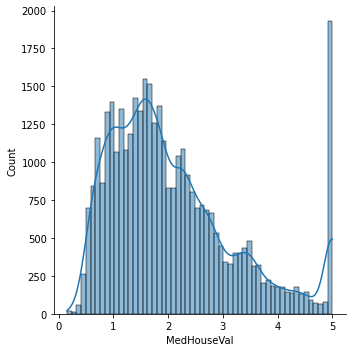

In [8]:
sns.displot(train['MedHouseVal'], kde=True)

In [9]:
train['MedHouseVal'].value_counts() #有很多的值只出現一次 可能不利於學習

5.00001    1827
1.62500     215
1.37500     194
1.12500     171
1.87500     169
           ... 
4.18400       1
4.71400       1
4.18500       1
0.79100       1
0.51100       1
Name: MedHouseVal, Length: 3723, dtype: int64

In [14]:
removals = train['MedHouseVal'].value_counts().reset_index() #篩選出次數
removals = removals[removals['MedHouseVal'] > 1]['index'].values #把大於1的index篩選出來變成一個array

In [18]:
filtered_train = train[train['MedHouseVal'].isin(removals)] #讓只有被篩選出來(出現次數大於1的) =filtered_train
train = filtered_train
train

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


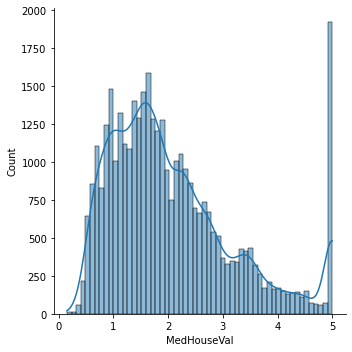

In [19]:
sns.displot(train['MedHouseVal'], kde=True)

(-0.5, 50.5, 0.0, 6.0)

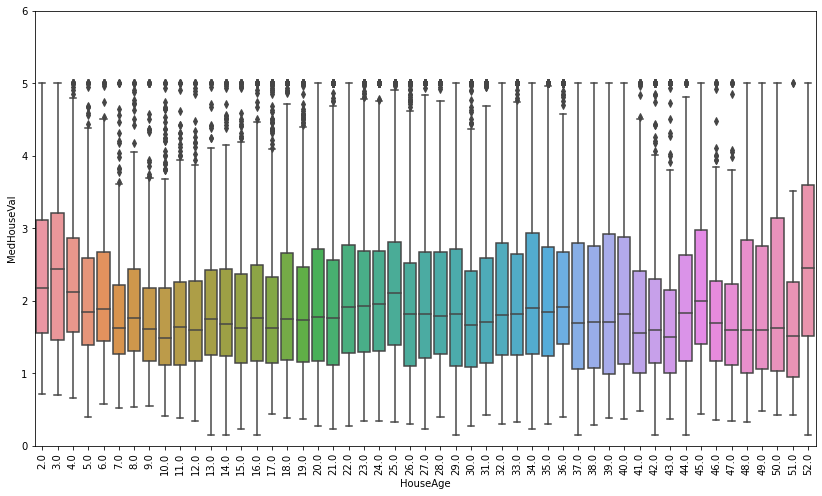

In [22]:
var = 'HouseAge'
data = pd.concat([train['MedHouseVal'], train[var]],axis = 1) #把訓練資料的答案跟訓練資料的房子年齡concat起來 看關聯性
f , ax = plt.subplots(figsize=(14, 8)) #(figure, axes) figure代表整個圖片 axes代表座標軸
fig = sns.boxplot(x = var, y='MedHouseVal', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #把數字轉90度避免重疊
fig.axis(ymin = 0, ymax = 6)

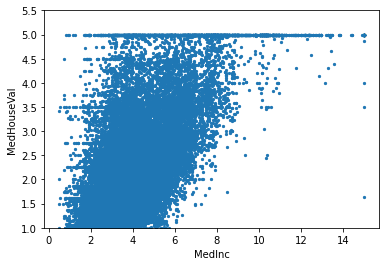

In [35]:
var = 'MedInc'
data = pd.concat([train['MedHouseVal'],train[var]],axis = 1) #把收入中位數跟房價concat
data.plot.scatter(x=var, y='MedHouseVal', ylim=(1,5.5),s=5) #y軸大小 s=標記大小

In [36]:
target = train['MedHouseVal']

combi = train.drop('MedHouseVal', axis=1).append(test) #結合train data跟test data ,drop MedHouseVal
combi.drop('id',axis = 1)
combi

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


#sns.jointplot(x=data['x'], y=data['y'], kind='scatter')

'jointplot'函數是seaborn函數庫中用於創建帶有直方圖或kde圖的散點圖的函數。它用於顯示兩個變量之間的雙變量關係。x和y變量作為參數傳遞給函數，並通過在x軸上繪製x變量和在y軸上繪製y變量來創建圖表。  

'jointplot'函數有幾個可選參數可用於定制圖表的外觀。一些最常用的參數包括:  

'kind'：繪製的圖表類型，'scatter'，'reg'，'resid'，'kde'或'hex'。  
'height'：圖表高度（以英寸為單位）。  
'ratio'：散點圖高度與直方圖高度的比率。  
'color': 圖表的顏色  
'joint_kws': 傳遞給底層繪圖函數的額外關鍵字參數。  
'marginal_kws': 傳遞給邊限圖的底層繪圖函數的額外關鍵字參數。
範例：  
sns.jointplot(x=data['x'], y=data['y'], kind='scatter')  

<Figure size 720x720 with 0 Axes>

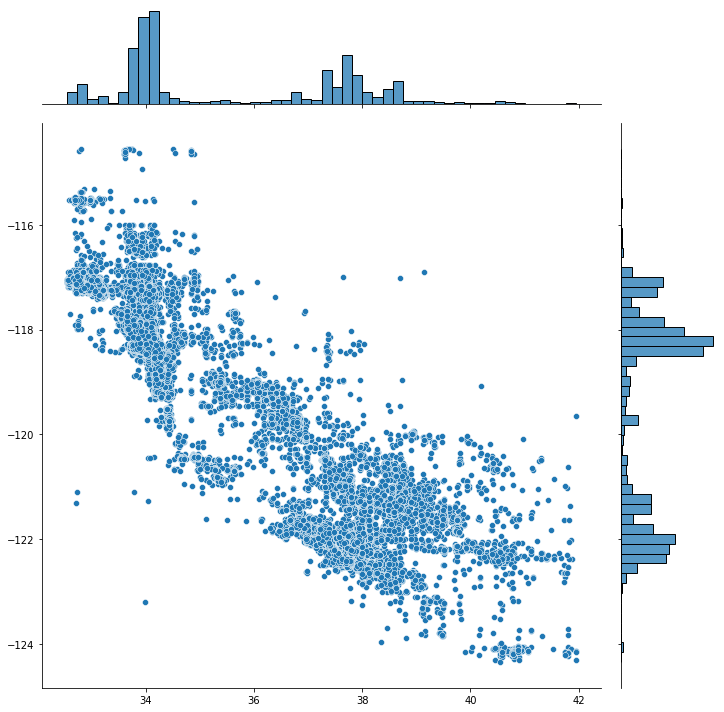

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [38]:
plt.figure(figsize=(10,10)) #創建新圖表
sns.jointplot(x=combi.Latitude.values, y=combi.Longitude.values, height = 10) #緯度 經度
plt.ylabel('Longitude', fontsize=12) #經度 #設定標籤及標籤大小
plt.xlabel('Laitude', fontsize=12) #緯度
plt.show()
sns.despine #移除上方跟右側的骨架

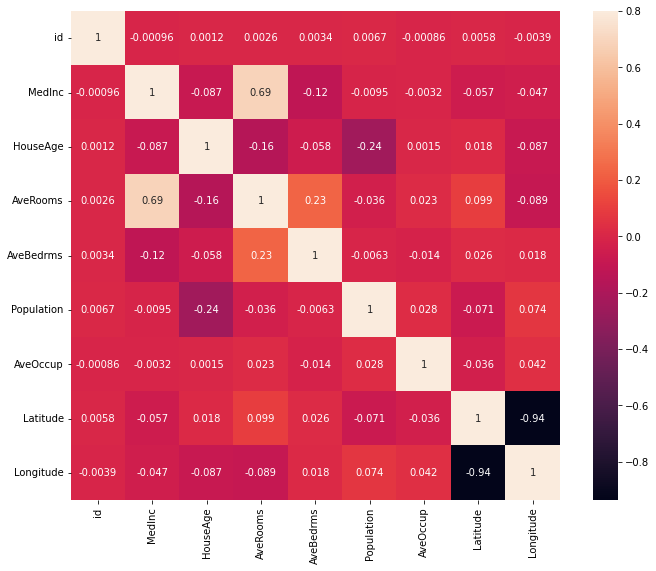

In [42]:
corrmat = combi.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True) #加入annot=True顯示數字

In [43]:
corrmat

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,1.000000,-0.000959,0.001222,0.002582,0.003448,0.006651,-0.000865,0.005809,-0.003950
MedInc,-0.000959,1.000000,-0.087198,0.688922,-0.116839,-0.009529,-0.003228,-0.056855,-0.046515
HouseAge,0.001222,-0.087198,1.000000,-0.159717,-0.058280,-0.238458,0.001514,0.018352,-0.086717
AveRooms,0.002582,0.688922,-0.159717,1.000000,0.234143,-0.036227,0.023111,0.098930,-0.088888
AveBedrms,0.003448,-0.116839,-0.058280,0.234143,1.000000,-0.006260,-0.014351,0.025600,0.017785
Population,0.006651,-0.009529,-0.238458,-0.036227,-0.006260,1.000000,0.027593,-0.070660,0.073856
AveOccup,-0.000865,-0.003228,0.001514,0.023111,-0.014351,0.027593,1.000000,-0.036234,0.042037
Latitude,0.005809,-0.056855,0.018352,0.098930,0.025600,-0.070660,-0.036234,1.000000,-0.936821
Longitude,-0.003950,-0.046515,-0.086717,-0.088888,0.017785,0.073856,0.042037,-0.936821,1.000000


In [45]:
#標準化 轉成0~1

combi = (combi - combi.min()) / (combi.max() - combi.min())
combi

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.000000,0.130067,0.26,0.053703,0.061210,0.035791,0.003429,0.218085,0.431633
1,0.000016,0.221990,0.30,0.093152,0.055422,0.042070,0.006070,0.653191,0.319388
2,0.000032,0.294830,0.50,0.102575,0.060317,0.029653,0.003385,0.229787,0.397959
3,0.000048,0.131991,0.28,0.045096,0.046543,0.035091,0.002637,0.011702,0.740816
4,0.000065,0.224142,1.00,0.061953,0.056925,0.050170,0.001673,0.558511,0.197959
...,...,...,...,...,...,...,...,...,...
24754,0.999935,0.123281,0.64,0.055283,0.058527,0.024188,0.002602,0.201064,0.469388
24755,0.999952,0.177804,0.62,0.070751,0.053867,0.045545,0.003110,0.163830,0.652041
24756,0.999968,0.151460,0.24,0.067539,0.067038,0.109224,0.003535,0.527660,0.359184
24757,0.999984,0.464242,0.12,0.120129,0.051869,0.038818,0.003657,0.119149,0.650000


In [46]:
# 定義X跟y

X = combi[:len(train)]
y = target #target = train['MedHouseVal']

X_test = combi[len(train):]

In [47]:
X['target'] = target

<ipython-input-47-be8ae45ade04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['target'] = target


In [48]:
X

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.000000,0.130067,0.26,0.053703,0.061210,0.035791,0.003429,0.218085,0.431633,0.980
1,0.000016,0.221990,0.30,0.093152,0.055422,0.042070,0.006070,0.653191,0.319388,0.946
2,0.000032,0.294830,0.50,0.102575,0.060317,0.029653,0.003385,0.229787,0.397959,1.576
3,0.000048,0.131991,0.28,0.045096,0.046543,0.035091,0.002637,0.011702,0.740816,1.336
4,0.000065,0.224142,1.00,0.061953,0.056925,0.050170,0.001673,0.558511,0.197959,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,0.599919,0.196128,0.96,0.073720,0.057937,0.049665,0.004495,0.174468,0.611224,1.856
37133,0.599935,0.222818,0.48,0.076445,0.046602,0.028112,0.007073,0.507447,0.254082,1.588
37134,0.599952,0.253217,1.00,0.069071,0.060149,0.032316,0.001328,0.553191,0.194898,3.387
37135,0.599968,0.152715,0.28,0.087679,0.056838,0.016284,0.004060,0.622340,0.343878,1.592


In [50]:
train = X.sample(frac=.9, random_state = 27)
val = X.drop(train.index)

X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

X_val = val.iloc[:,:-1]
y_val = val.iloc[:,-1]


print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(33168, 9)
(33168,)
(3685, 9)
(3685,)


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7434103866728166


In [52]:
y_pred = model.predict(X_val)
print(model.score(X_val,y_val)) #查看驗證集上的分數

0.7270242376262765


In [55]:
# 用RMSE評估

def calc_rmse(y_true, y_pred):
  MSE = np.square(np.subtract(y_true, y_pred)).mean()
  RMSE = np.sqrt(MSE)
  return RMSE

print('RMSE:', calc_rmse(y_val, y_pred))  


RMSE: 0.6131659937963041


In [56]:
compare = pd.DataFrame({'actual':y_val.values.ravel(),'predicted':y_pred})
compare

,actual,predicted
0,0.92600,1.149721
1,1.81600,1.928358
2,0.73700,1.288898
3,1.16200,2.195666
4,1.14800,1.913373
...,...,...
3680,2.94900,3.367883
3681,2.09400,2.088838
3682,5.00001,4.431687
3683,1.32000,0.992055


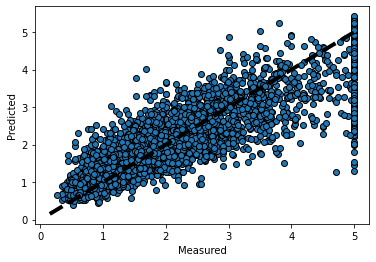

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred, edgecolors=(0,0,0))
ax.plot([y.min(),y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [58]:
prediction = model.predict(X_test)
prediction

array([0.68807802, 1.1887385 , 3.96735397, ..., 1.30552263, 3.73369304,
       3.87152099])

In [59]:
submit['MedHouseVal'] = prediction

submit.to_csv('/content/drive/MyDrive/data analytics/California_Housing_Dataset/submission.csv', index = False)

submission = pd.read_csv('/content/drive/MyDrive/data analytics/California_Housing_Dataset/submission.csv')
submission

,id,MedHouseVal
0,37137,0.688078
1,37138,1.188738
2,37139,3.967354
3,37140,3.225910
4,37141,2.382097
...,...,...
24754,61891,2.089823
24755,61892,1.993628
24756,61893,1.305523
24757,61894,3.733693
